In [1]:
### Sythetics for sP waveforms
# ** Satge-I: Plot show the synthetic waveforms using obspy
from obspy import read
import matplotlib.pyplot as plt
import numpy as np
from obspy.clients.iris import Client
from obspy.taup import TauPyModel
model = TauPyModel(model='iasp91')
client = Client()

In [2]:
wtdir='/home/ketan/IndiaConnectNTU/Week5-6/DownloadData/Data/Download3/SAC_all1'
evt = "20211231135935809"
stati = 'C1.MT02'

st = read(f"{wtdir}/{evt}/{stati}..BHZ.SAC.bp")
st += read(f"{wtdir}/{evt}/{stati}..BHR.SAC.bp")
st += read(f"{wtdir}/{evt}/{stati}..BHT.SAC.bp")
print(st)

sachd = st[0].stats.sac
distaz = client.distaz(sachd["stla"], sachd["stlo"], sachd["evla"], sachd["evlo"])
gcarc = distaz['distance']

P_arrivals = model.get_travel_times(source_depth_in_km=sachd["evdp"],
                                  distance_in_degree=gcarc, phase_list=['P'])
print(P_arrivals)

3 Trace(s) in Stream:
C1.MT02..BHZ | 2021-12-31T13:57:27.619135Z - 2021-12-31T14:00:27.609135Z | 100.0 Hz, 18000 samples
C1.MT02..BHR | 2021-12-31T13:57:27.619135Z - 2021-12-31T14:00:27.609135Z | 100.0 Hz, 18000 samples
C1.MT02..BHT | 2021-12-31T13:57:27.619135Z - 2021-12-31T14:00:27.609135Z | 100.0 Hz, 18000 samples
5 arrivals
	P phase arrival at 68.206 seconds
	P phase arrival at 79.062 seconds
	P phase arrival at 79.150 seconds
	P phase arrival at 86.167 seconds
	P phase arrival at 86.231 seconds


In [3]:
sachd["stla"], sachd["stlo"], sachd["evla"], sachd["evlo"]

(-33.2591, -71.1377, -33.4523, -65.7747)

In [4]:
S_arrivals = model.get_travel_times(source_depth_in_km=sachd["evdp"],
                                  distance_in_degree=gcarc, phase_list=['S'])
print(S_arrivals)

5 arrivals
	S phase arrival at 121.576 seconds
	S phase arrival at 136.958 seconds
	S phase arrival at 137.111 seconds
	S phase arrival at 148.741 seconds
	S phase arrival at 148.850 seconds


In [5]:
print(sachd['evdp'], gcarc)

9.76 4.49827


In [6]:
if(gcarc< 1.9):
    phase_list = ['sPvmP']
else:
    phase_list = ['sPn']

In [7]:
sP_arrivals = model.get_travel_times(source_depth_in_km=sachd["evdp"],
                                  distance_in_degree=gcarc, phase_list=phase_list)
print(sP_arrivals)

1 arrivals
	sPn phase arrival at 72.031 seconds


In [8]:
S_arrival_aligned = S_arrivals[0].time - P_arrivals[0].time
S_arrival_aligned

53.36965165376374

In [9]:
sP_arrival_aligned = sP_arrivals[0].time - P_arrivals[0].time
sP_arrival_aligned

3.824749651380401

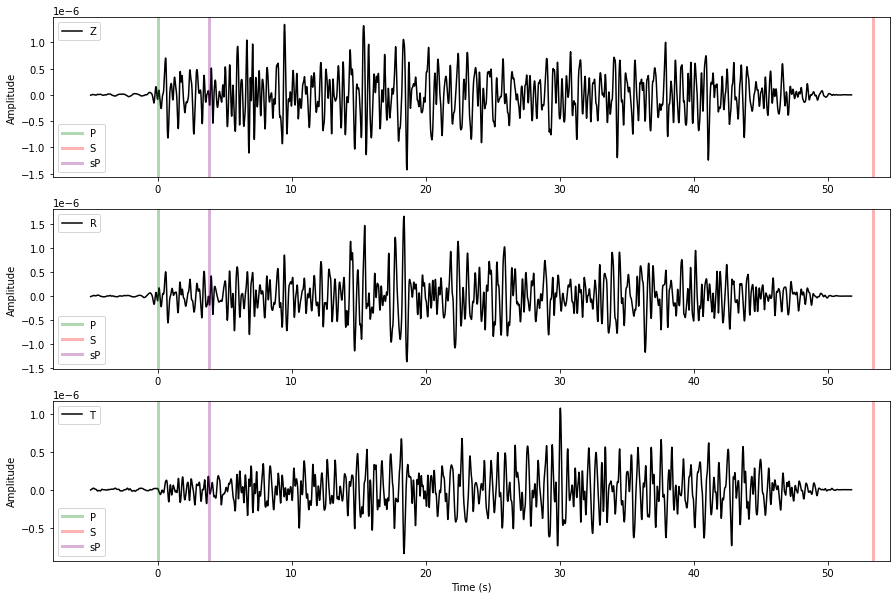

In [10]:
tb = st[0].stats.sac.b
tp = st[0].stats.sac.t1
#ts = st[0].stats.sac.t2
ts = S_arrival_aligned
tsP = sP_arrival_aligned
delta = st[0].stats.sac.delta
npts = int(56.8/delta)
bpoint = int((tp-5-tb)/delta)
time = np.arange(tp-5,tp-5+npts*delta,delta)

plt.subplots(figsize=(15, 10))
plt.subplot(3, 1, 1)
line1, = plt.plot(time-tp,st[0].data[bpoint:bpoint+npts], '-k', label="Z")
plt.ylabel('Amplitude')
plt.legend(loc="upper left")
first_legend = plt.legend(handles=[line1], loc='upper left')
plt.gca().add_artist(first_legend)
## Phase arrivals
line2 = plt.axvline(x=0, color='green', linewidth=3, alpha=0.3, label="P")
line3 = plt.axvline(x=ts-tp, color='red', linewidth=3, alpha=0.3, label="S")
line4 = plt.axvline(x=tsP-tp, color='purple', linewidth=3, alpha=0.3, label="sP")
plt.legend(handles=[line2,line3, line4], loc='lower left')

plt.subplot(3, 1, 2)
line1, = plt.plot(time-tp,st[1].data[bpoint:bpoint+npts], '-k', label="R")
plt.ylabel('Amplitude')
plt.legend(loc="upper left")
first_legend = plt.legend(handles=[line1], loc='upper left')
plt.gca().add_artist(first_legend)
## Phase arrivals
line2 = plt.axvline(x=0, color='green', linewidth=3, alpha=0.3, label="P")
line3 = plt.axvline(x=ts-tp, color='red', linewidth=3, alpha=0.3, label="S")
line4 = plt.axvline(x=tsP-tp, color='purple', linewidth=3, alpha=0.3, label="sP")
plt.legend(handles=[line2,line3, line4], loc='lower left')

plt.subplot(3, 1, 3)
line1, = plt.plot(time-tp,st[2].data[bpoint:bpoint+npts], '-k', label="T")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
first_legend = plt.legend(handles=[line1], loc='upper left')
plt.gca().add_artist(first_legend)
## Phase arrivals
line2 = plt.axvline(x=0, color='green', linewidth=3, alpha=0.3, label="P")
line3 = plt.axvline(x=ts-tp, color='red', linewidth=3, alpha=0.3, label="S")
line4 = plt.axvline(x=tsP-tp, color='purple', linewidth=3, alpha=0.3, label="sP")
plt.legend(handles=[line2,line3, line4], loc='lower left')

plt.show()


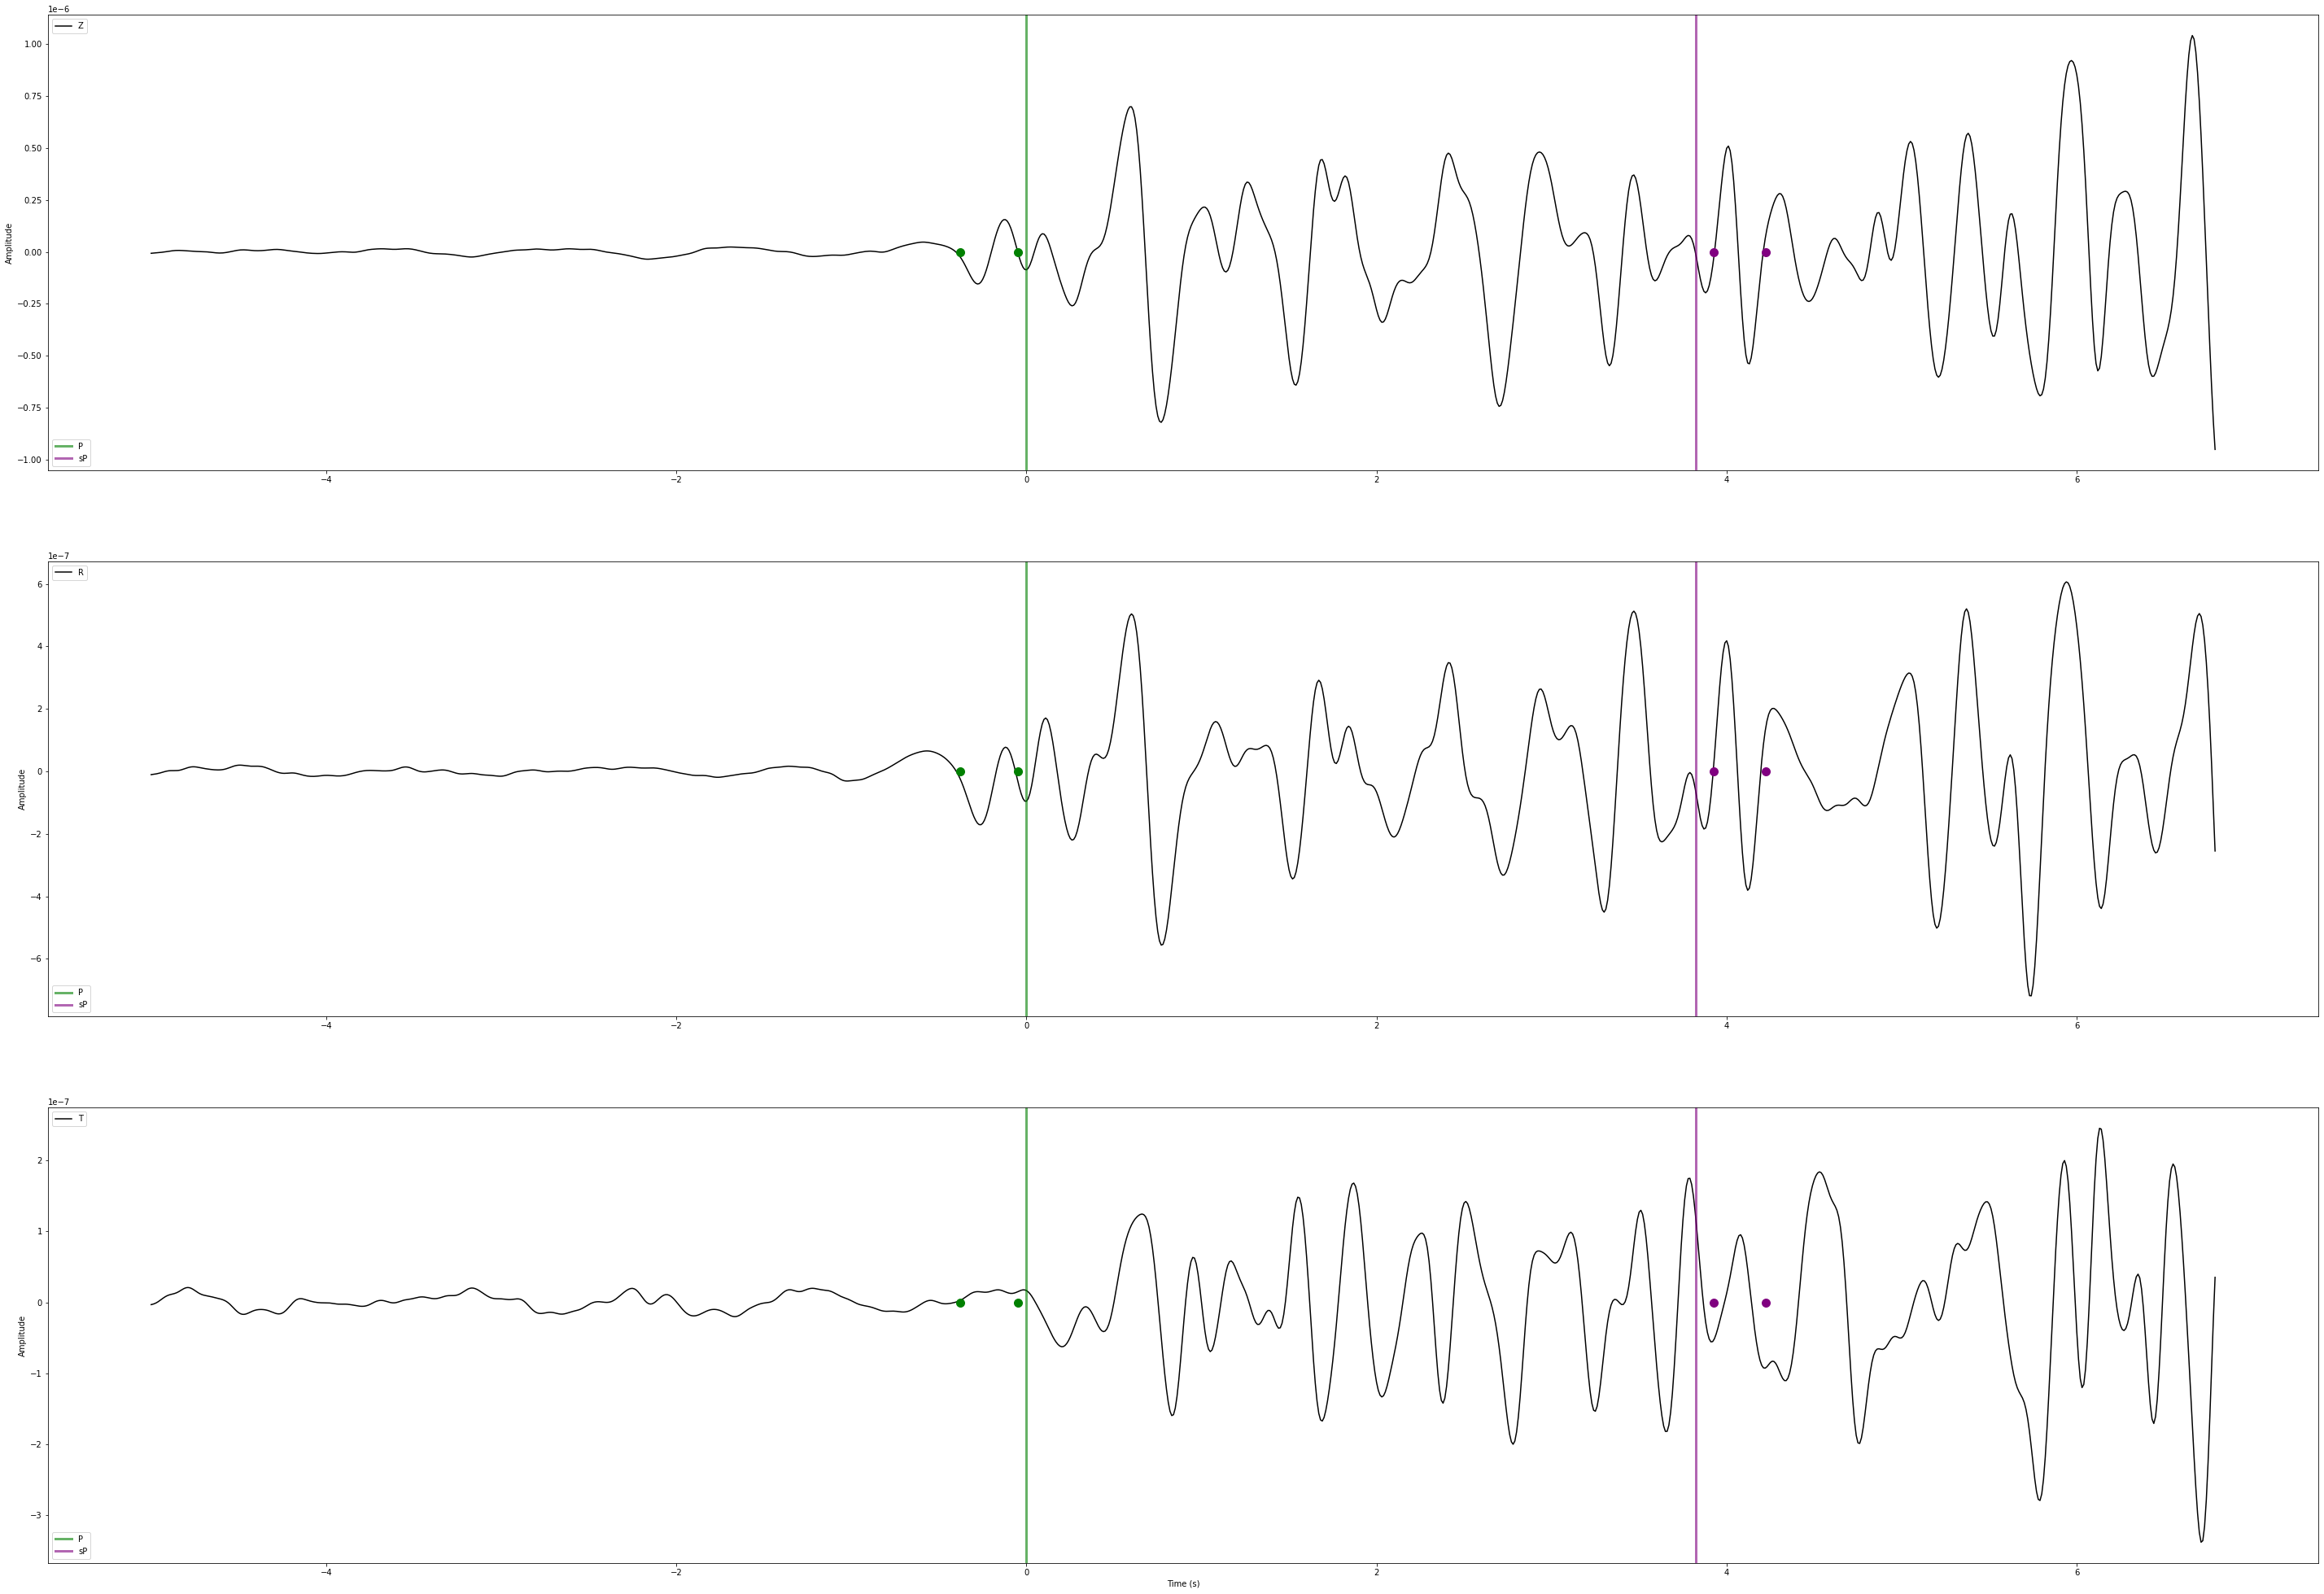

In [24]:
time = np.arange(tp-5,tp-5+npts*delta-45, delta)
plt.subplots(figsize=(50, 35))
plt.subplot(3, 1, 1)
line1, = plt.plot(time-tp,st[0].data[bpoint:bpoint+npts-4500], '-k', label="Z")
plt.plot(0-0.38,0, 'o', markersize=10, color='green')
plt.plot(0-.05,0, 'o', markersize=10, color='green')
plt.plot(tsP+0.1,0, 'o', markersize=10, color='purple')
plt.plot(tsP+0.4,0, 'o', markersize=10, color='purple')
plt.ylabel('Amplitude')
plt.legend(loc="upper left")
first_legend = plt.legend(handles=[line1], loc='upper left')
plt.gca().add_artist(first_legend)
## Phase arrivals
line2 = plt.axvline(x=0, color='green', linewidth=3, alpha=0.6, label="P")
line3 = plt.axvline(x=tsP, color='purple', linewidth=3, alpha=0.6, label="sP")
plt.legend(handles=[line2, line3], loc='lower left')


plt.subplot(3, 1, 2)
line1, = plt.plot(time-tp,st[1].data[bpoint:bpoint+npts-4500], '-k', label="R")
plt.plot(0-0.38,0, 'o', markersize=10, color='green')
plt.plot(0-.05,0, 'o', markersize=10, color='green')
plt.plot(tsP+0.1,0, 'o', markersize=10, color='purple')
plt.plot(tsP+0.4,0, 'o', markersize=10, color='purple')
plt.ylabel('Amplitude')
plt.legend(loc="upper left")
first_legend = plt.legend(handles=[line1], loc='upper left')
plt.gca().add_artist(first_legend)
## Phase arrivals
line2 = plt.axvline(x=0, color='green', linewidth=3, alpha=0.6, label="P")
line3 = plt.axvline(x=tsP, color='purple', linewidth=3, alpha=0.6, label="sP")
plt.legend(handles=[line2, line3], loc='lower left')

plt.subplot(3, 1, 3)
line1, = plt.plot(time-tp,st[2].data[bpoint:bpoint+npts-4500], '-k', label="T")
plt.plot(0-0.38,0, 'o', markersize=10, color='green')
plt.plot(0-.05,0, 'o', markersize=10, color='green')
plt.plot(tsP+0.1,0, 'o', markersize=10, color='purple')
plt.plot(tsP+0.4,0, 'o', markersize=10, color='purple')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
first_legend = plt.legend(handles=[line1], loc='upper left')
plt.gca().add_artist(first_legend)
## Phase arrivals
line2 = plt.axvline(x=0, color='green', linewidth=3, alpha=0.6, label="P")
line3 = plt.axvline(x=tsP, color='purple', linewidth=3, alpha=0.6, label="sP")
plt.legend(handles=[line2, line3], loc='lower left')

plt.show()

In [12]:
npts

5680

In [13]:
delta

0.01

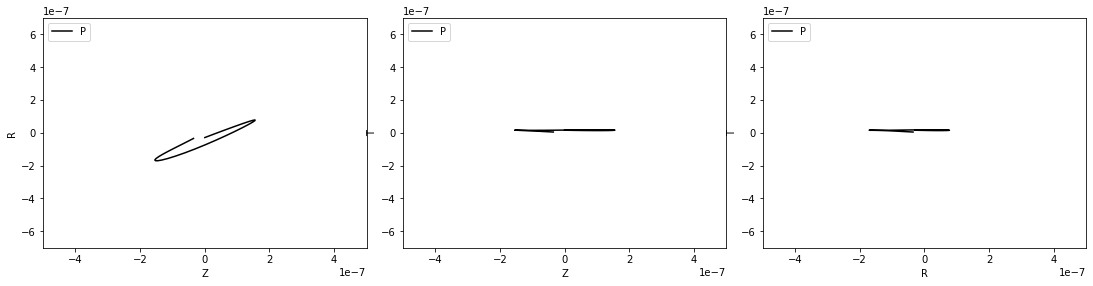

In [14]:
### Particle Motion for P wave
# -0.5s to 1.5s

pbef = bpoint + 500 - 37
paft = bpoint + 500 - 4 

plt.subplots(figsize=(15, 7))
plt.subplot(2, 3, 1)
plt.plot(st[0].data[pbef:paft],st[1].data[pbef:paft], '-k', label="P")
plt.xlabel('Z')
plt.ylabel('R')
plt.xlim([-0.0000005,0.0000005])
plt.ylim([-0.0000007,0.0000007])
plt.legend(loc="upper left")

plt.subplot(2, 3, 2)
plt.plot(st[0].data[pbef:paft],st[2].data[pbef:paft], '-k', label="P")
plt.xlabel('Z')
plt.ylabel('T')
plt.xlim([-0.0000005,0.0000005])
plt.ylim([-0.0000007,0.0000007])
plt.legend(loc="upper left")

plt.subplot(2, 3, 3)
plt.plot(st[1].data[pbef:paft],st[2].data[pbef:paft], '-k', label="P")
plt.xlabel('R')
plt.ylabel('T')
plt.xlim([-0.0000005,0.0000005])
plt.ylim([-0.0000007,0.0000007])
plt.legend(loc="upper left")

plt.tight_layout(pad=0.05)

In [15]:
bpoint

12318

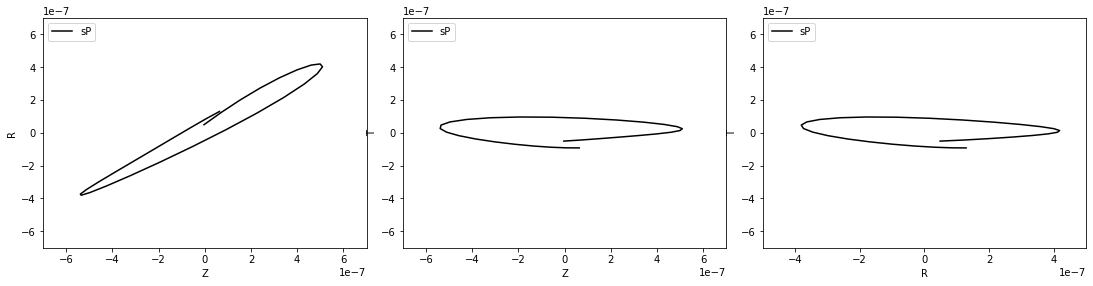

In [16]:
### Particle Motion for sP wave
# -0.5s to 1.5s

sppoint = bpoint+500+int(tsP*(1/delta))
spbef = sppoint+11
spaft = sppoint+41

plt.subplots(figsize=(15, 7))
plt.subplot(2, 3, 1)
plt.plot(st[0].data[spbef:spaft],st[1].data[spbef:spaft], '-k', label="sP")
plt.xlabel('Z')
plt.ylabel('R')
plt.xlim([-0.0000007,0.0000007])
plt.ylim([-0.0000007,0.0000007])
plt.legend(loc="upper left")

plt.subplot(2, 3, 2)
plt.plot(st[0].data[spbef:spaft],st[2].data[spbef:spaft], '-k', label="sP")
plt.xlabel('Z')
plt.ylabel('T')
plt.xlim([-0.0000007,0.0000007])
plt.ylim([-0.0000007,0.0000007])
plt.legend(loc="upper left")

plt.subplot(2, 3, 3)
plt.plot(st[1].data[spbef:spaft],st[2].data[spbef:spaft], '-k', label="sP")
plt.xlabel('R')
plt.ylabel('T')
plt.xlim([-0.0000005,0.0000005])
plt.ylim([-0.0000007,0.0000007])
plt.legend(loc="upper left")

plt.tight_layout(pad=0.05)

In [17]:
sppoint

13200

In [18]:
bpoint

12318

In [19]:
ts

53.36965165376374

In [20]:
tsP

3.824749651380401